In [1]:
import pandas as pd

In [2]:
#LOADING DATASETS
movies = pd.read_csv("/Users/daaminibatra/Downloads/archive (1)/tmdb_5000_movies.csv")
credits = pd.read_csv("/Users/daaminibatra/Downloads/archive (1)/tmdb_5000_credits.csv")

# DATASETS USED

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies.shape

(4803, 20)

In [6]:
credits.shape

(4803, 4)

# MERGEING THE TWO DATASETS/DATAFRAMES

In [7]:
movies=movies.merge(credits,on="title")
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
movies.shape #title column is not repeated

(4809, 23)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [10]:
#relevant columns from the dataset for recommendation system
#genres
#movie_id
#keywords
#title
#overview
#cast
#crew
#release_date
#popularity
#vote_average
#vote_count

movies=movies[["movie_id","title","overview","genres","keywords","cast","crew","popularity","release_date","vote_average","vote_count"]]


# DATA CLEANING (REMOVING THE MISSING AND DUPLICATE DATA)

In [11]:
#checking missing data exists or not

movies.isnull().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
popularity      0
release_date    1
vote_average    0
vote_count      0
dtype: int64

In [12]:
#removing the movies data whose overview or release_date don't exist
movies.dropna(inplace=True)

In [13]:
movies.isnull().sum()

movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

In [14]:
#checking for duplicate data

movies.duplicated().sum()

0

# DEMOGRAPHIC FILTERING 

In [15]:
#C is the mean vote across the whole report
C= movies['vote_average'].mean()
C

6.094526534859521

In [16]:
#m is the minimum votes required to be listed in the chart
m= movies['vote_count'].quantile(0.8)
m

959.0

In [17]:
movies = movies.copy().loc[movies['vote_count'] >= m]
movies.shape

(962, 11)

In [18]:
#v is the number of votes for the movie
#R is the average rating of the movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
movies['score'] = movies.apply(weighted_rating, axis=1)

Text(0.5, 1.0, 'Popular Movies')

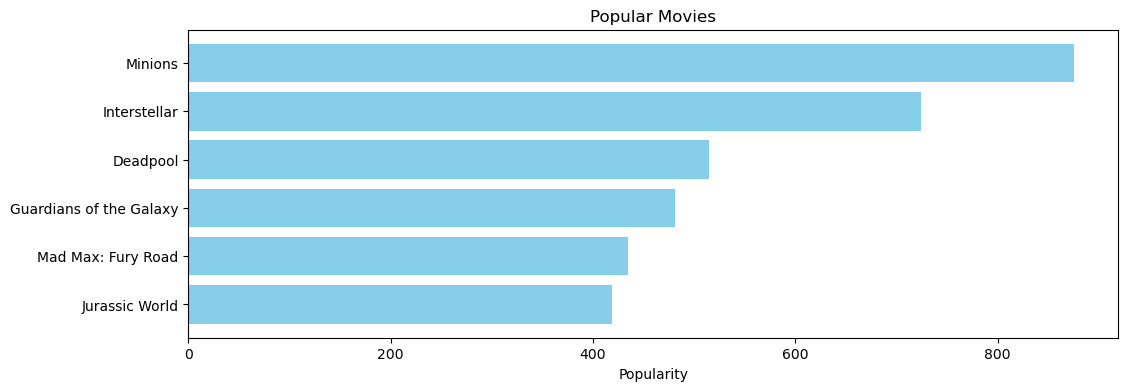

In [20]:
#TOP 6 POPULAR MOVIES
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")



Text(0.5, 1.0, 'High Rating Movies')

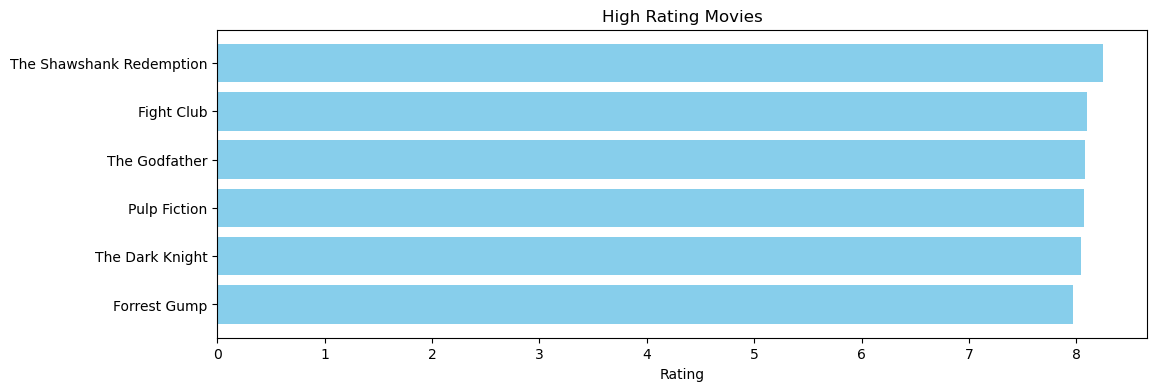

In [21]:
#TOP 6 HIGH RATING MOVIES
pop= movies.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("High Rating Movies")


In [22]:
movies

,movie_id,title,overview,genres,keywords,cast,crew,popularity,release_date,vote_average,vote_count,score
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577,2009-12-10,7.2,11800,7.116910
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",139.082615,2007-05-19,6.9,4500,6.758500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",107.376788,2015-10-26,6.3,4466,6.263678
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",112.312950,2012-07-16,7.6,9106,7.456557
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",43.926995,2012-03-07,6.1,2124,6.098297
...,...,...,...,...,...,...,...,...,...,...,...,...
4583,23827,Paranormal Activity,"After a young, middle class couple moves into ...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...","[{""cast_id"": 3, ""character"": ""Katie"", ""credit_...","[{""credit_id"": ""52fe4477c3a368484e024b01"", ""de...",47.456823,2007-09-14,5.9,1316,5.982000
4585,762,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...","[{""id"": 113, ""name"": ""holy grail""}, {""id"": 345...","[{""cast_id"": 11, ""character"": ""King Arthur / V...","[{""credit_id"": ""52fe4272c3a36847f801f66f"", ""de...",64.782984,1975-03-13,7.8,1708,7.186746
4608,389,12 Angry Men,The defense and the prosecution have rested an...,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 934, ""name"": ""judge""}, {""id"": 1417, ""n...","[{""cast_id"": 29, ""character"": ""Juror 8"", ""cred...","[{""credit_id"": ""52fe423dc3a36847f800ec55"", ""de...",59.259204,1957-03-25,8.2,2078,7.535150
4645,431,Cube,Seven strangers are taken out of their daily l...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...","[{""id"": 483, ""name"": ""riddle""}, {""id"": 1646, ""...","[{""cast_id"": 5, ""character"": ""Leaven"", ""credit...","[{""credit_id"": ""52fe4243c3a36847f80107bf"", ""de...",44.656151,1997-09-09,6.9,1069,6.519108


# DATA TRANSFORMATION

FEATURE ENGINEERING

In [23]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [24]:
#convert 
#[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"},{"id": 878, "name": "Science Fiction"}]'
#to
#["Action","Adventure","Fantasy","Science Fiction"]

In [25]:
#converting string of list to list using literal_eval from ast library

In [26]:
import ast

In [27]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L

In [28]:
movies["genres"]=movies["genres"].apply(convert)

#applying convert method to keywords attribute as well
movies["keywords"]=movies["keywords"].apply(convert)

In [29]:
def top3cast(obj):
    L=[]
    count=0
    for i in ast.literal_eval(obj):
        if count!=3:
            L.append(i["name"])
            count+=1
        else:
            break
    return L

In [30]:
movies["cast"]=movies["cast"].apply(top3cast)

In [31]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i["job"]=="Director":
            L.append(i["name"])
            break
    return L

In [32]:
movies["crew"]=movies["crew"].apply(fetch_director)

In [33]:
temp=movies["genres"]+movies["keywords"]+movies["cast"]+movies["crew"]
temp.head(3)

0    [Action, Adventure, Fantasy, Science Fiction, ...
1    [Adventure, Fantasy, Action, ocean, drug abuse...
2    [Action, Adventure, Crime, spy, based on novel...
dtype: object

In [34]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,release_date,vote_average,vote_count,score
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],150.437577,2009-12-10,7.2,11800,7.116910
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],139.082615,2007-05-19,6.9,4500,6.758500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],107.376788,2015-10-26,6.3,4466,6.263678


In [35]:
#converting "Sam Worthington" into "SamWorthington" to improve the recommender system performance 
for i in ["genres","keywords","cast","crew"]:
    temp[i]=movies[i].apply(lambda x:[j.replace(" ","") for j in x])

In [36]:
movies["tags"]= movies["overview"].apply(lambda x:x.split())+temp["genres"]+\
temp["keywords"]+temp["cast"]+temp["crew"]

In [37]:
temp.cast.head(2)

0    [SamWorthington, ZoeSaldana, SigourneyWeaver]
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley]
Name: cast, dtype: object

In [38]:
movies["tags"]=movies["tags"].apply(lambda x:" ".join(x))

In [39]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,release_date,vote_average,vote_count,score,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],150.437577,2009-12-10,7.2,11800,7.116910,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],139.082615,2007-05-19,6.9,4500,6.758500,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],107.376788,2015-10-26,6.3,4466,6.263678,A cryptic message from Bond’s past sends him o...


# USING STEMMING

In [40]:
import nltk

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [42]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
movies["tags"]=movies["tags"].apply(stem)

In [44]:
#EXAMPLE
print(stem("Lovely Loving"))

love love


# USING CountVectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv=CountVectorizer(max_features=5000,stop_words="english")

In [47]:
vector=cv.fit_transform(movies["tags"]).toarray()

In [48]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
vector.shape

(962, 5000)

In [50]:
len(cv.get_feature_names_out())

5000

In [51]:
for i in cv.get_feature_names_out():
    print(i)

000
007
10
11
12
13
14
15
150
15thcenturi
16
16th
17
18thcenturi
1912
1927
1930
1940
1941
1945
1950
1950s
1955
1960
1960s
1970
1972
1979
1980
1980s
1985
1986
1990
1995
1999
19th
19thcenturi
20
200
2001
2005
2019
24
30
300
3d
40
47
50
500
70
aaron
aaroneckhart
abandon
abduct
abil
abl
aboard
abolitionist
abov
abrahamlincoln
abram
absolut
abus
aca
acapella
accept
access
accid
accident
accompani
accomplic
accomplish
account
accus
accused
ace
achiev
act
action
actionhero
activ
activist
actor
actress
actual
adalin
adam
adammckay
adamsandl
adapt
addict
adjust
admir
adolesc
adolf
adolfhitl
adopt
ador
adrenalin
adrian
adrienbrodi
adrift
adult
adulteri
adulthood
advanc
adventur
adventure
adventures
adversari
advic
advis
advisor
affair
affect
afford
afraid
africa
african
aftercreditssting
afterlif
aftermath
ag
age
agediffer
agenc
agency
agenda
agent
ago
agre
ahead
aid
aim
air
airborn
airforc
airplan
airplanecrash
airport
al
aladdin
alan
alantaylor
alantudyk
alaska
albanian
albert
alcatraz
alcohol

# USING COSINE SIMILARITY

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
cosine_similarity(vector).shape

(962, 962)

In [54]:
similarity=cosine_similarity(vector)

In [55]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

[(785, 0.26452002850644324),
 (576, 0.23002185311411805),
 (389, 0.22886885410853178),
 (358, 0.22621385432622335),
 (60, 0.2204792759220492)]

# BASIC SEARCH ENGINE FOR RECOMMENDING TOP 5 MOVIES SIMILAR TO THE INPUT MOVIE

In [56]:
def recommend(movie):
    movie_index=movies[movies["title"]==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(i[0],movies.iloc[i[0]].title)

In [57]:
recommend("Avatar")

785 Aliens
576 Predators
389 Battle: Los Angeles
358 Independence Day
60 Jupiter Ascending


In [58]:
movie_index=movies[movies["title"]=="Avatar"].index[0]

In [59]:
distances=similarity[movie_index]
movies_list=sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

In [60]:
movies_list

[(785, 0.26452002850644324),
 (576, 0.23002185311411805),
 (389, 0.22886885410853178),
 (358, 0.22621385432622335),
 (60, 0.2204792759220492)]

# USING PICKLE

In [61]:
import pickle

In [62]:
pickle.dump(movies.to_dict(),open("movie_dict2.pkl","wb"))

In [63]:
pickle.dump(similarity,open("similarity2.pkl","wb"))

In [64]:
unique_genres = set()

In [65]:
unique_genres_list = sorted(list(movies['genres'].explode().unique()))

In [66]:
pickle.dump(unique_genres_list,open("unique_genres2.pkl","wb"))

In [67]:
actors = set()
actors = sorted(list(movies['cast'].explode().unique()))

In [68]:
pickle.dump(actors,open("actors.pkl","wb"))

In [69]:
actors=pickle.load(open('actors.pkl','rb'))

In [70]:
directer=set()
directer = sorted(list(movies['crew'].explode().unique()))

In [71]:
pickle.dump(directer,open("directer.pkl","wb"))